In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import read_table

In [22]:


selected_columns = None
df_bat = read_table("Batting", selected_columns = selected_columns)

selected_columns = ["playerID", "birthYear", "weight", "height", "debut"] # ignoring R and L data
df_master = read_table("Master", selected_columns = selected_columns)

In [23]:
df_bat.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abbotku01,1993,1,OAK,AL,20,61.0,11.0,15.0,1.0,...,9.0,2.0,0.0,3.0,20.0,0.0,0.0,3.0,0.0,3.0
1,abbotku01,1994,1,FLO,NL,101,345.0,41.0,86.0,17.0,...,33.0,3.0,0.0,16.0,98.0,1.0,5.0,3.0,2.0,5.0
2,abbotku01,1995,1,FLO,NL,120,420.0,60.0,107.0,18.0,...,60.0,4.0,3.0,36.0,110.0,4.0,5.0,2.0,5.0,6.0
3,abbotku01,1996,1,FLO,NL,109,320.0,37.0,81.0,18.0,...,33.0,3.0,3.0,22.0,99.0,1.0,3.0,4.0,0.0,7.0
4,abbotku01,1997,1,FLO,NL,94,252.0,35.0,69.0,18.0,...,30.0,3.0,1.0,14.0,68.0,3.0,1.0,6.0,0.0,5.0


In [24]:
df_master.head()

,playerID,birthYear,weight,height,debut
0,aardsda01,1981.0,220.0,75.0,2004-04-06
1,aasedo01,1954.0,190.0,75.0,1977-07-26
2,abadan01,1972.0,184.0,73.0,2001-09-10
3,abadfe01,1985.0,220.0,73.0,2010-07-28
4,abbotje01,1972.0,190.0,74.0,1997-06-10


In [25]:
joined_df = pd.merge(df_bat, df_master, how="inner", on="playerID")

In [26]:
joined_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SO,IBB,HBP,SH,SF,GIDP,birthYear,weight,height,debut
0,abbotku01,1993,1,OAK,AL,20,61.0,11.0,15.0,1.0,...,20.0,0.0,0.0,3.0,0.0,3.0,1969.0,180.0,71.0,1993-09-07
1,abbotku01,1994,1,FLO,NL,101,345.0,41.0,86.0,17.0,...,98.0,1.0,5.0,3.0,2.0,5.0,1969.0,180.0,71.0,1993-09-07
2,abbotku01,1995,1,FLO,NL,120,420.0,60.0,107.0,18.0,...,110.0,4.0,5.0,2.0,5.0,6.0,1969.0,180.0,71.0,1993-09-07
3,abbotku01,1996,1,FLO,NL,109,320.0,37.0,81.0,18.0,...,99.0,1.0,3.0,4.0,0.0,7.0,1969.0,180.0,71.0,1993-09-07
4,abbotku01,1997,1,FLO,NL,94,252.0,35.0,69.0,18.0,...,68.0,3.0,1.0,6.0,0.0,5.0,1969.0,180.0,71.0,1993-09-07


In [28]:
joined_df["current_age"] = joined_df.apply(lambda row: row["yearID"] - row["birthYear"], axis=1)
joined_df["years_of_experience"] = joined_df.apply(lambda row: row["yearID"] - int(row["debut"][:4]), axis=1)

joined_df.drop(columns=["debut", "birthYear"])

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SO,IBB,HBP,SH,SF,GIDP,weight,height,current_age,years_of_experience
0,abbotku01,1993,1,OAK,AL,20,61.0,11.0,15.0,1.0,...,20.0,0.0,0.0,3.0,0.0,3.0,180.0,71.0,24.0,0
1,abbotku01,1994,1,FLO,NL,101,345.0,41.0,86.0,17.0,...,98.0,1.0,5.0,3.0,2.0,5.0,180.0,71.0,25.0,1
2,abbotku01,1995,1,FLO,NL,120,420.0,60.0,107.0,18.0,...,110.0,4.0,5.0,2.0,5.0,6.0,180.0,71.0,26.0,2
3,abbotku01,1996,1,FLO,NL,109,320.0,37.0,81.0,18.0,...,99.0,1.0,3.0,4.0,0.0,7.0,180.0,71.0,27.0,3
4,abbotku01,1997,1,FLO,NL,94,252.0,35.0,69.0,18.0,...,68.0,3.0,1.0,6.0,0.0,5.0,180.0,71.0,28.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13750,zobribe01,2012,1,TBA,AL,157,560.0,88.0,151.0,39.0,...,103.0,7.0,3.0,2.0,6.0,13.0,210.0,75.0,31.0,6
13751,zobribe01,2013,1,TBA,AL,157,612.0,77.0,168.0,36.0,...,91.0,4.0,7.0,1.0,6.0,18.0,210.0,75.0,32.0,7
13752,zobribe01,2014,1,TBA,AL,146,570.0,83.0,155.0,34.0,...,84.0,4.0,1.0,2.0,6.0,8.0,210.0,75.0,33.0,8
13753,zobribe01,2015,1,OAK,AL,67,235.0,39.0,63.0,20.0,...,26.0,2.0,0.0,0.0,3.0,5.0,210.0,75.0,34.0,9


In [44]:
joined_df["lgID"].value_counts()

NL    6970
AL    6785
Name: lgID, dtype: int64

In [38]:
temp_df = joined_df[joined_df["stint"] == 1]
at_base_agglo_data = temp_df[["playerID", "yearID"]].groupby(['playerID']).count()
at_base_agglo_data

,yearID
playerID,
abbotku01,9
abreubo01,18
abreujo02,2
ackledu01,5
adamsma01,4
...,...
yountro01,9
zaungr01,16
zeileto01,16


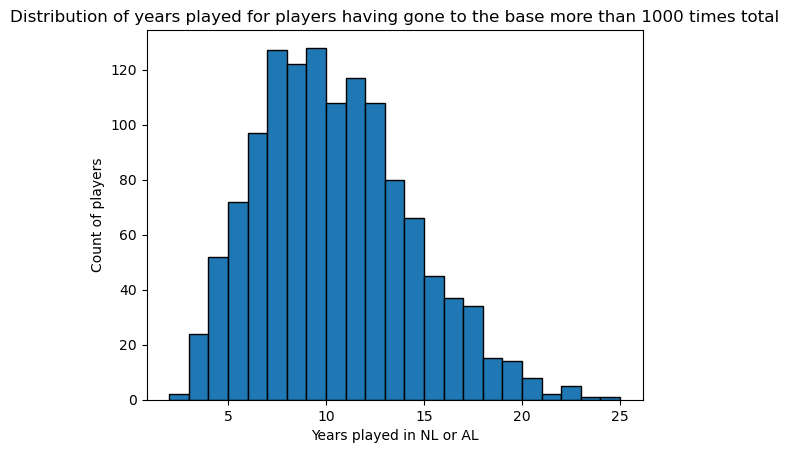

In [40]:
# Create a histogram with bins of width 1
data = at_base_agglo_data["yearID"]
min_value = min(data)
max_value = max(data)
bins = np.arange(min_value, max_value + 2)  # +2 to include the max value in its own bin

# Count how many values fall into each bin
counts, bin_edges = np.histogram(data, bins=bins)

# Create the bar graph
plt.bar(bin_edges[:-1], counts, width=1, align='edge', edgecolor='black')

# Add labels and title
plt.title('Distribution of years played for players having gone to the base more than 1000 times total')
plt.xlabel('Years played in NL or AL')
plt.ylabel('Count of players')

# Display the graph
plt.show()

In [ ]:
new_file_path = "working_csv_data/" + "PlayerBatting" + ".csv"
joined_df.to_csv(new_file_path)